# PyCPT Object-Oriented 

### Official Version Available Here: https://bitbucket.org/py-iri/iri-pycpt/src/master/


#### Author: 
Kyle Hall (kjh2171@columbia.edu)

#### Original Authors: 
Ángel G. Muñoz (agmunoz@iri.columbia.edu), Andrew W. Robertson (awr@iri.columbia.edu), Simon J. Mason (simon@iri.columbia.edu)

#### Acknowledgements: 
Nachiketa Acharya (nachiketa@iri.columbia.edu) for mentorship.
Rémi Cousin (IRI) for key Ingrid code development and support.
Xandre Chourio (IRI) for Windows and code support, and testing.
James Doss-Gollin (Columbia Water Center) developed the original download Python functions.
Part of the effort to develop PyCPT is funded by the Columbia World Project "Adapting Agriculture to Climate Today, for Tomorrow" (ACToday), and NOAA MAPP's projects NA18OAR4310275 (Muñoz) and NA16OAR4310145 (Robertson).


#### Input:
* Predictor is rainfall from S2S ECMWF (no realtime), or NCEP CFSv2 (realtime), or SubX GEFS (realtime)
* Predictand is either rainfall total or frequency of rainy days from TRMM (3B42 v7) or CPC Unified or IMD

#### Output:
* Several skill maps for assessment of deterministic forecast AND forecast maps, in the output folder.
* CPT scripts used to assess skill, in the scripts folder.
* Downloaded input files, in the input folder.


#### Works Cited:
Simon J. Mason, Michael K. Tippet, Lulin Song, Ángel G. Muñoz. 2020. Climate Predictability Tool version 16.5.8. Columbia University Academic Commons. https://doi.org/10.7916/d8-em5q-0f07

Ángel G. Muñoz. (2019, November 24). agmunozs/PyCPT: PyCPTv1.5 (Version v1.5). Zenodo. http://doi.org/10.5281/zenodo.3551936


### Namelist section

In [1]:
########Work Folder Options:
work = "Test" #Work name (name of the work folder; e.g., one word followed by "_seasonal":)
workdir = "/Users/kylehall/Projects/PYCPT/kycpt/" # Where do you want to make the work folder-- this should already exist
cptdir='/Users/kylehall/CPT/16.5.8/' # PATH to CPT directory (folder containing CPT.x)

#Plot Settings:
use_topo = "False" #whether or not to print stock image (topography) on Predictor / Predictand Domains in PltDomain
shp_file = 'None' #path from pycpt_functions_seasonal.py to your shape file
use_default = 'True' #Make False to turn off default country boundaries
map_color = 'CPT' #Choose mapping colorscheme: "CPT",  "Angel", or look here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

########Model (choose one, a subset or all models: 
#CMC1-CanCM3, CMC2-CanCM4,  COLA-RSMAS-CCSM4*, GFDL-CM2p5-FLOR-A06*, GFDL-CM2p5-FLOR-B01*,GFDL-CM2p1-aer04*, NASA-GEOSS2S*, NCEP-CFSv2*)
#The ones with "*" are producing operational forecasts, the others are frozen. 
models=['GFDL-CM2p1-aer04', 'COLA-RSMAS-CCSM4']#,'GFDL-CM2p5-FLOR-A06','CMC1-CanCM3']#, 'GFDL-CM2p5-FLOR-B01', 'CMC1-CanCM3', 'CMC2-CanCM4','NCEP-CFSv2', 'NASA-GEOSS2S']

#####Choose metrics (options are: 'Pearson','Spearman','2AFC','RocAbove','RocBelow', 'RMSE',  'Ignorance', 'RPSS', 'GROC'):
met=['Pearson','Spearman','2AFC','RocAbove','RocBelow', 'RMSE', 'Ignorance', 'RPSS', 'GROC']

########Obs (choose between CPC-CMAP-URD, CHIRPS, TRMM, CPC, Chilestations,GPCC)
obs='ENACTS-BD'
station=False

########MOS method (choose between None, PCR, CCA) #Esto es calibracion
MOS='CCA' 


#only used if MOS == 'CCA' or MOS == 'PCR'
xmodes_min = 1
xmodes_max = 5
ymodes_min = 2
ymodes_max = 5
ccamodes_min = 1
ccamodes_max = 5
eofmodes = 3 #number of EOF modes to compute

########Predictand (choose between PRCP, RFREQ)
PREDICTAND='PRCP'

########Predictor (choose between GCM's PRCP, VQ, UQ)
#VQ and UQ only works with models=['NCEP-CFSv2']
PREDICTOR='PRCP'

########Target seasons and related parameters
##If more targets, increase the arrays accordingly
#mons=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mons=[ 'May', 'Sep']
tgti=['1.5', '1.5']  #S: start for the DL
tgtf=['4.5', '3.5']   #S: end for the DL
#for now, just write the target period (for DL)
#tgts=['Feb-Apr','Mar-May','Apr-Jun','May-Jul','Jun-Aug','Jul-Sep','Aug-Oct','Sep-Nov','Oct-Dec','Nov-Jan','Dec-Feb','Jan-Mar'] 
tgts=['Jun-Sep', 'Oct-Dec']

tini = 1982
tend = 2009

########Forecast date  
monf=['May', 'Sep'] 	# Initialization month 
fyr=2020 	# Forecast year

########Switches: 
force_download = False   #force download of data files, even if they already exist locally --- IF YOU ALREADY HAVE OBS FILES, DOUBLE CHECK WHICH ONES THEY ARE --- True to be safe

# ########Spatial domain for predictor
nla1=35 	# Northernmost latitude
sla1=15 	# Southernmost latitude
wlo1=80 	# Westernmost longitude
elo1=100 	# Easternmost longitude
# Spatial domain for predictand
nla2=28 	# Northernmost latitude
sla2=20 	# Southernmost latitude
wlo2=87 	# Westernmost longitude
elo2=94 	# Easternmost longitude



### End of namelist section 

#### Load Libraries

In [6]:
import pycpt_oo as po


pycpt = po.PYCPT(work, workdir, cptdir, use_topo, shp_file, use_default, map_color, models, tgts, met, obs, station, MOS, xmodes_min, xmodes_max, ymodes_min, ymodes_max, ccamodes_min, ccamodes_max, eofmodes, PREDICTOR,PREDICTAND, mons, tgti, tgtf, tini, tend, monf, fyr, force_download, nla1, sla1, elo1, wlo1,nla2, sla2,elo2, wlo2, verbose=True)
pycpt.initialize()


Predictand is Rainfall Total (mm)
Predictand is Rainfall Total (mm)
Invalid ShapeFile - using default


## Check if domains are ok --if you don't like them, go back to the namelist and modify them

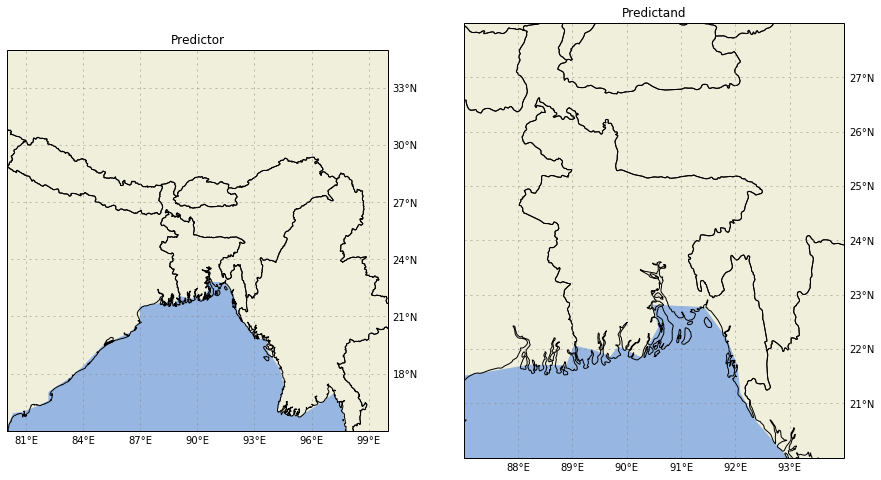

In [7]:
#Plot domains
pycpt.pltdomain()

# Download data if necessary, and run CPT

In [10]:

#If downloadling data from several models, this section might take a while to be done
for model in models:
    print('\n\n\n--------Starting process for '+model+'--------')
    for tgt in range(len(tgts)):
    
        ########Set Up Useful Variables Automatically - tini & tend may change based on tgt
            
        #download input files for CPT
        pycpt.prepFiles( model,  tgt)
        
        #write CPT input script automatically
        pycpt.CPTscript(model, tgt)
        
        #run CPT
        pycpt.run(model, tgt)
        




--------Starting process for GFDL-CM2p1-aer04--------
Preparing CPT files for GFDL-CM2p1-aer04 and initialization May...
Hindcasts file ready to go
----------------------------------------------
Observations file ready to go
----------------------------------------------
Forecasts file ready to go
----------------------------------------------
Executing CPT for GFDL-CM2p1-aer04 and initialization May...
----------------------------------------------
Calculations for May initialization completed!
See output folder, and check scripts/CPT_stout_train_GFDL-CM2p1-aer04_Jun-Sep_May.txt for errors
----------------------------------------------
----------------------------------------------



Preparing CPT files for GFDL-CM2p1-aer04 and initialization Sep...
Hindcasts file ready to go
----------------------------------------------
Observations file ready to go
----------------------------------------------
Forecasts file ready to go
----------------------------------------------
Executing 

## Deterministic Skill Analysis

Invalid ShapeFile - using default

Pearson


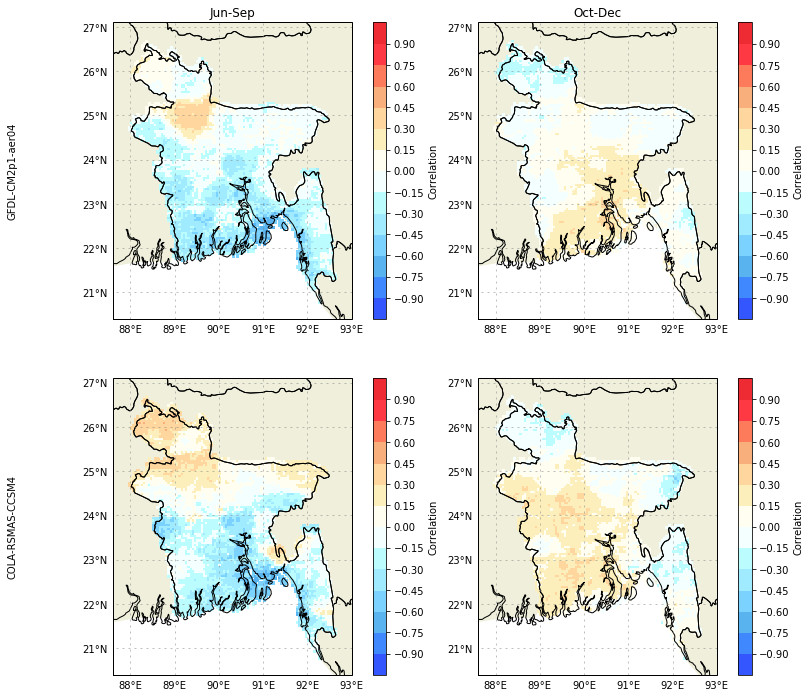

Invalid ShapeFile - using default

Spearman


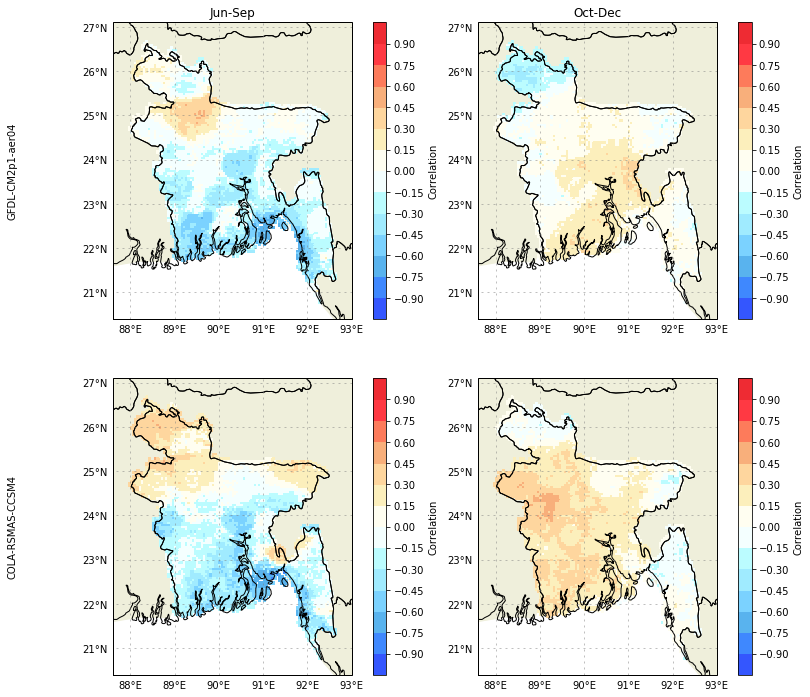

Invalid ShapeFile - using default

2AFC


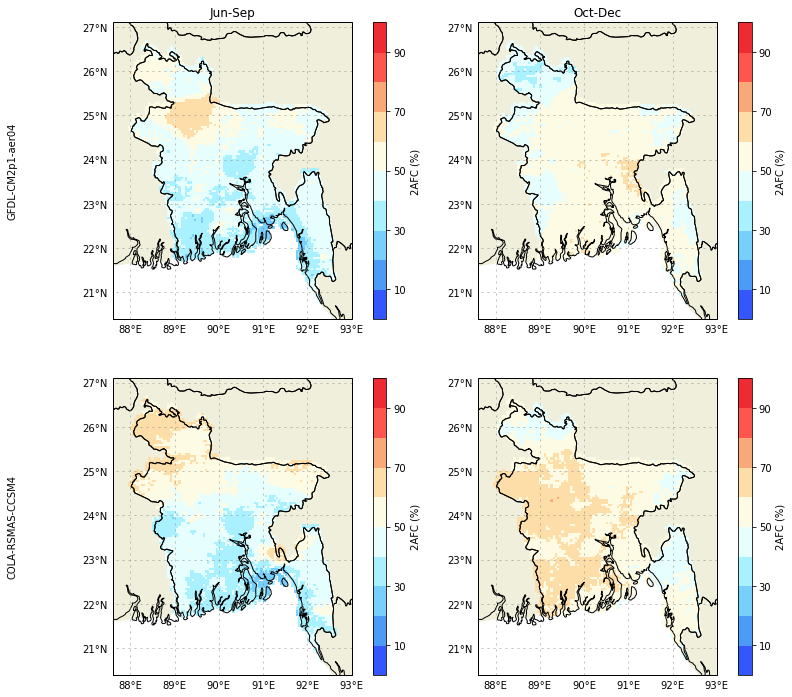

Invalid ShapeFile - using default

RocAbove


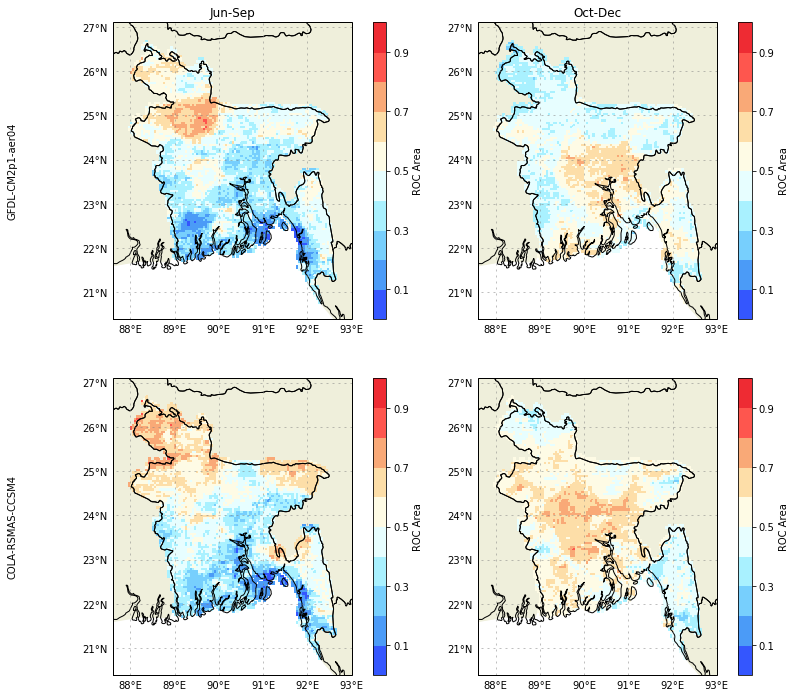

Invalid ShapeFile - using default

RocBelow


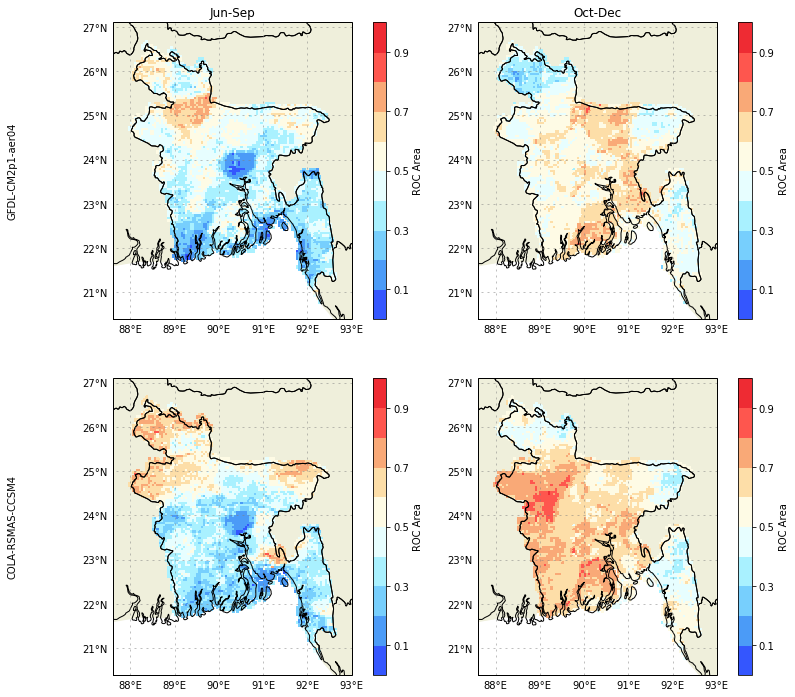

Invalid ShapeFile - using default

RMSE


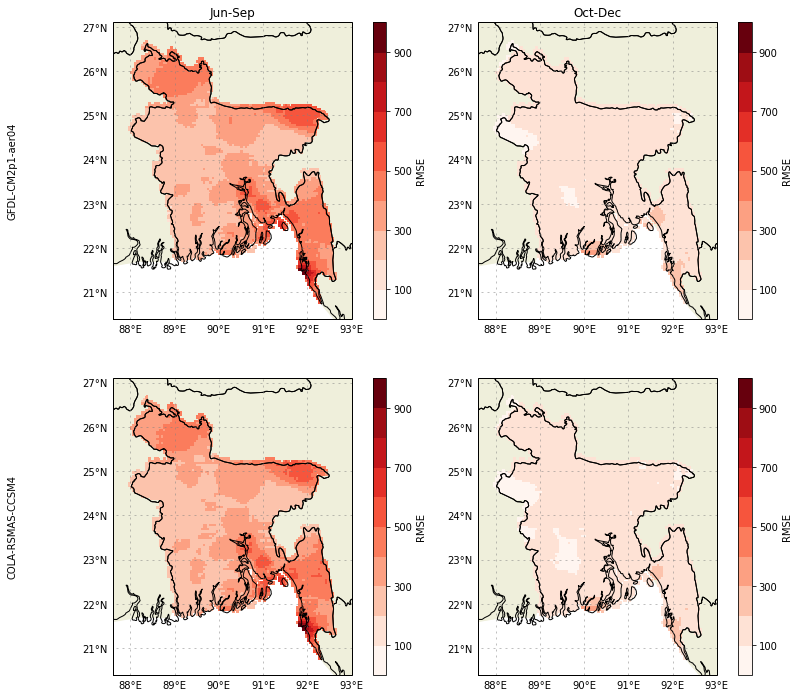

Invalid ShapeFile - using default

Ignorance


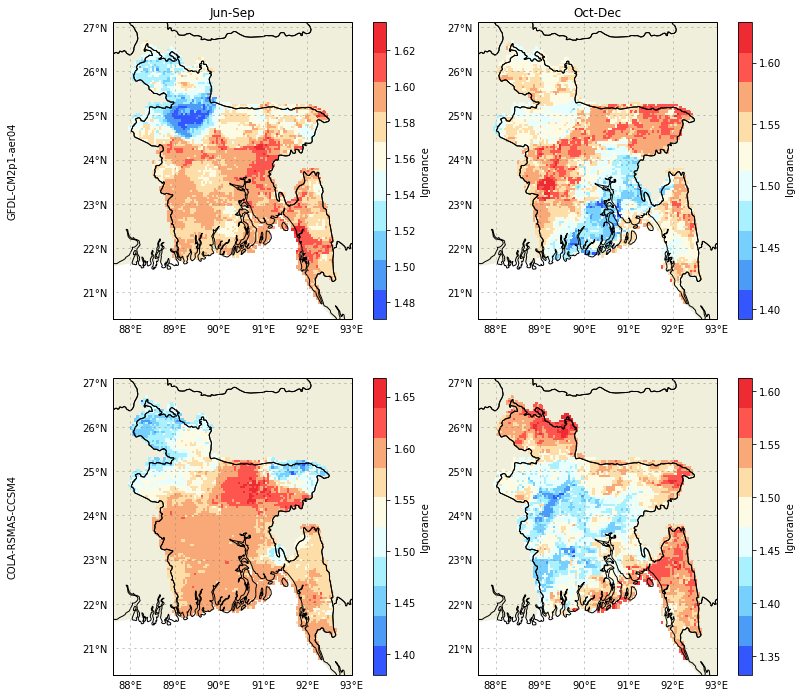

Invalid ShapeFile - using default

RPSS


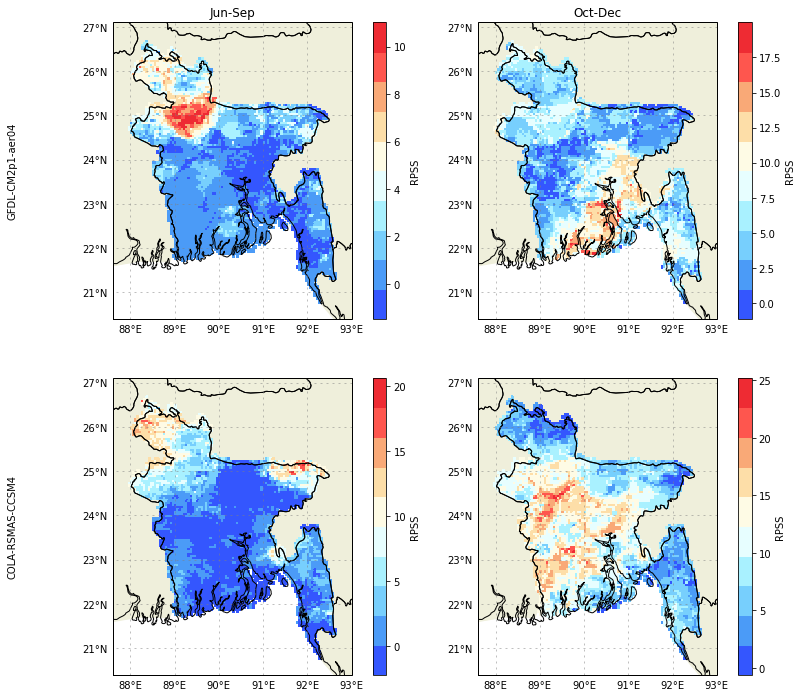

Invalid ShapeFile - using default

GROC


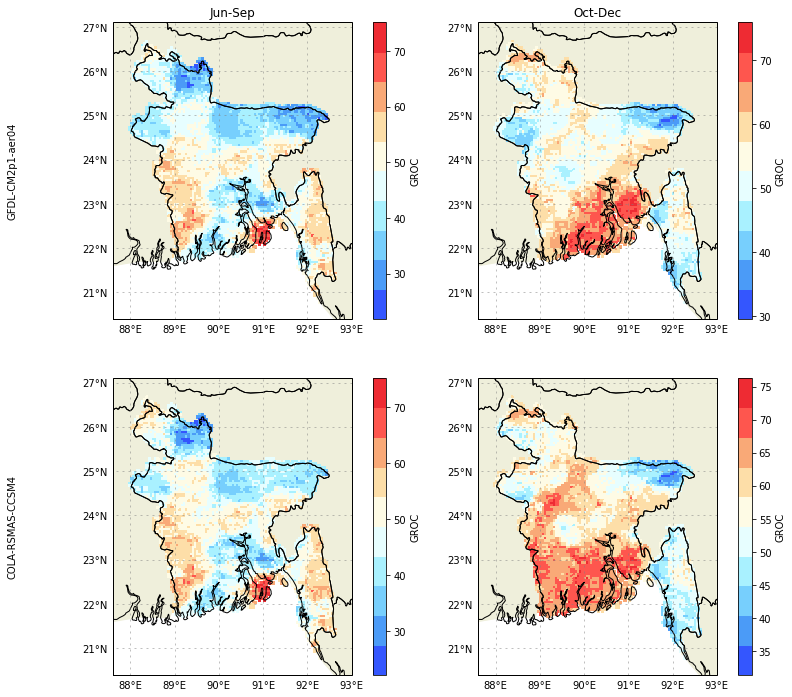

In [11]:
# Skill scores loop
for metric in met:
    pycpt.pltmap(metric, models, MOS=MOS)   

##### EOF Analysis (only available if MOS=PCR or CCA)

In [ ]:
# Skill scores loop
for mode in range(eofmodes):
    pycpt.plteofs(mode)  

## Multi-model ensemble: NextGen

In [ ]:
#select which models you want to use for your ensemble
models=['GFDL-CM2p1-aer04'] #'COLA-RSMAS-CCSM4','GFDL-CM2p5-FLOR-A06','CMC1-CanCM3' 'GFDL-CM2p5-FLOR-B01', 'CMC1-CanCM3', 'CMC2-CanCM4','NCEP-CFSv2']
for tgt in range(len(tgts)):

    #prepare files for nextgen input using simple mean
    pycpt.NGensemble(models, tgts[tgt])
    
    #write CPT input script automatically
    pycpt.CPTscript('NextGen', tgts[tgt])

    #run CPT
    pycpt.run('NextGen', tgts[tgt])

In [ ]:
# Skill scores loop
for metric in met:
    pycpt.pltmap(metric, ['NextGen'], MOS='None')   

# Real-Time Forecast

In [ ]:
pycpt.plt_deterministic()
pycpt.plt_probabilistic()

In [ ]:
pycpt.ensemblefiles()